# Анализ ценообразования квартир 

In [31]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Открываем наш датасет с данными из сайта ЦИАН и смотрим структуру полученных данных

In [32]:
df = pd.read_csv('cian_data.csv', delimiter=';', encoding='utf-8').drop_duplicates()
pd.set_option('display.max_columns', None)
df.head()

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,phone,district,street,house_number,underground,residential_complex
0,Метражи group,real_estate_agent,https://www.cian.ru/sale/flat/308167237/,Москва,sale,flat,5.0,7.0,1.0,34.6,9000000.0,1978.0,-1.0,-1,-1.0,-1,18 м²,8 м²,7.985041e+10,Северное Измайлово,15-я Парковая,54,Щёлковская,NaN
1,ЛэндЛ,real_estate_agent,https://www.cian.ru/sale/flat/302263383/,Москва,sale,flat,14.0,45.0,1.0,41.3,12800000.0,2026.0,-1.0,-1,-1.0,Без отделки,20 м²,11 м²,7.964559e+10,Нижегородский,Перовское шоссе,NaN,Нижегородская,Level Нижегородская
2,Stenoy,developer,https://www.cian.ru/sale/flat/300878920/,Москва,sale,flat,10.0,12.0,1.0,34.4,19372498.0,2026.0,-1.0,Монолитно-кирпичный,-1.0,"Без отделки, черновая, чистовая","11,8 м²","11,7 м²",7.499716e+10,Преображенское,Электрозаводская,60,Преображенская площадь,ARTEL
3,Alliance Agency Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/298254403/,Москва,sale,flat,4.0,33.0,1.0,42.9,23600000.0,-1.0,-1.0,-1,-1.0,-1,"22,9 м²",15 м²,7.965188e+10,Останкинский,Годовикова,11к2,Алексеевская,iLove
4,Зиля Карамова,realtor,https://www.cian.ru/sale/flat/263316279/,Москва,sale,flat,1.0,16.0,1.0,37.7,9450000.0,1982.0,-1.0,-1,-1.0,-1,-1,-1,7.916094e+10,Чертаново Центральное,Варшавское шоссе,142К2,Пражская,NaN


Выведем общее количество данных

In [33]:
df.shape

(10583, 24)

Рассмотрим типы данных столбиков

In [34]:
df.dtypes

author                   object
author_type              object
url                      object
location                 object
deal_type                object
accommodation_type       object
floor                   float64
floors_count            float64
rooms_count             float64
total_meters            float64
price                   float64
year_of_construction    float64
object_type             float64
house_material_type      object
heating_type            float64
finish_type              object
living_meters            object
kitchen_meters           object
phone                   float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
dtype: object

In [35]:
print('Количество пропусков в kitchen_meters:', df[df['kitchen_meters'] == '-1'].shape[0] / df.shape[0] * 100)
print('Количество пропусков в living_meters:', df[df['living_meters'] == '-1'].shape[0] / df.shape[0] * 100)
print('Количество пропусков в house_material_type:', df[df['house_material_type'] == '-1'].shape[0] / df.shape[0] * 100)
print('Количество пропусков в finish_type:', df[df['finish_type'] == '-1'].shape[0] / df.shape[0] * 100)
print('Количество пропусков в heating_type:', df[df['heating_type'] == -1].shape[0] / df.shape[0] * 100)



Количество пропусков в kitchen_meters: 14.47604648965322
Количество пропусков в living_meters: 23.15033544363602
Количество пропусков в house_material_type: 88.13190966644619
Количество пропусков в finish_type: 83.74751960691675
Количество пропусков в heating_type: 99.95275441746196


Как мы можем увидеть у нас имеются колонки с неправильно заданными типами данных: kitchen_meters,living_meters - object, а должны быть float; floor, floors_count, rooms_count, year_of_construction должны быть в int.

Также удаляем строки с большим количеством пропусков

Исправим это в коде ниже

## Чистка данных

In [36]:
df = df[df['year_of_construction'].fillna(-1).astype(int) <= 2024]  # удаляю строки с годом больше 2024

df['living_meters'] = df['living_meters'].replace('м²', '', regex=True).replace(r'\xa0', '', regex=True).str.replace(',', '.').astype(float)    # убираю лишние знаки и меняю тип данных
df['kitchen_meters'] = df['kitchen_meters'].replace('м²', '', regex=True).replace(r'\xa0', '', regex=True).str.replace(',', '.').astype(float)

df['underground'] = df['underground'].fillna(-1)
df['floor'] = df['floor'].fillna(-1).astype(int)    # заполняю пропущенными значениями -1 и меняю тип данных на целые числа
df['floors_count'] = df['floors_count'].fillna(-1).astype(int)
df['rooms_count'] = df['rooms_count'].fillna(-1).astype(int)
df['year_of_construction'] = df['year_of_construction'].fillna(-1).astype(int)

df.drop(['phone', 'house_material_type', 'object_type', 'finish_type', 'heating_type', 'deal_type', 'accommodation_type'], axis=1, inplace=True)    # удаляю колонки с пустыми или ненужными данными
df = df[df['price'].notna()]
df['price'] = round(df['price']).astype(int)
df['price_per_sqm'] = round(df['price'] / df['total_meters']).astype(int)   # создаю и вычисляю цену за кв. метр

df.info

<bound method DataFrame.info of                             author        author_type  \
0                    Метражи group  real_estate_agent   
3      Alliance Agency Real Estate  real_estate_agent   
4                    Зиля Карамова            realtor   
6                     Омега-Эстейт  real_estate_agent   
8                     Dream Realty  real_estate_agent   
...                            ...                ...   
10608                  ID 12620057            unknown   
10609                Дом Гончарова  real_estate_agent   
10610                    ID 348616          homeowner   
10611                     ID 27112  real_estate_agent   
10612        Лабецкий Недвижимость  real_estate_agent   

                                                   url  location  floor  \
0             https://www.cian.ru/sale/flat/308167237/    Москва      5   
3             https://www.cian.ru/sale/flat/298254403/    Москва      4   
4             https://www.cian.ru/sale/flat/263316279/    

In [37]:
df.dtypes

author                   object
author_type              object
url                      object
location                 object
floor                     int64
floors_count              int64
rooms_count               int64
total_meters            float64
price                     int64
year_of_construction      int64
living_meters           float64
kitchen_meters          float64
district                 object
street                   object
house_number             object
underground              object
residential_complex      object
price_per_sqm             int64
dtype: object

После чистки данных у нас осталось 9536 строк

## Графики

Text(0.5, 1.0, 'Корреляция между переменными')

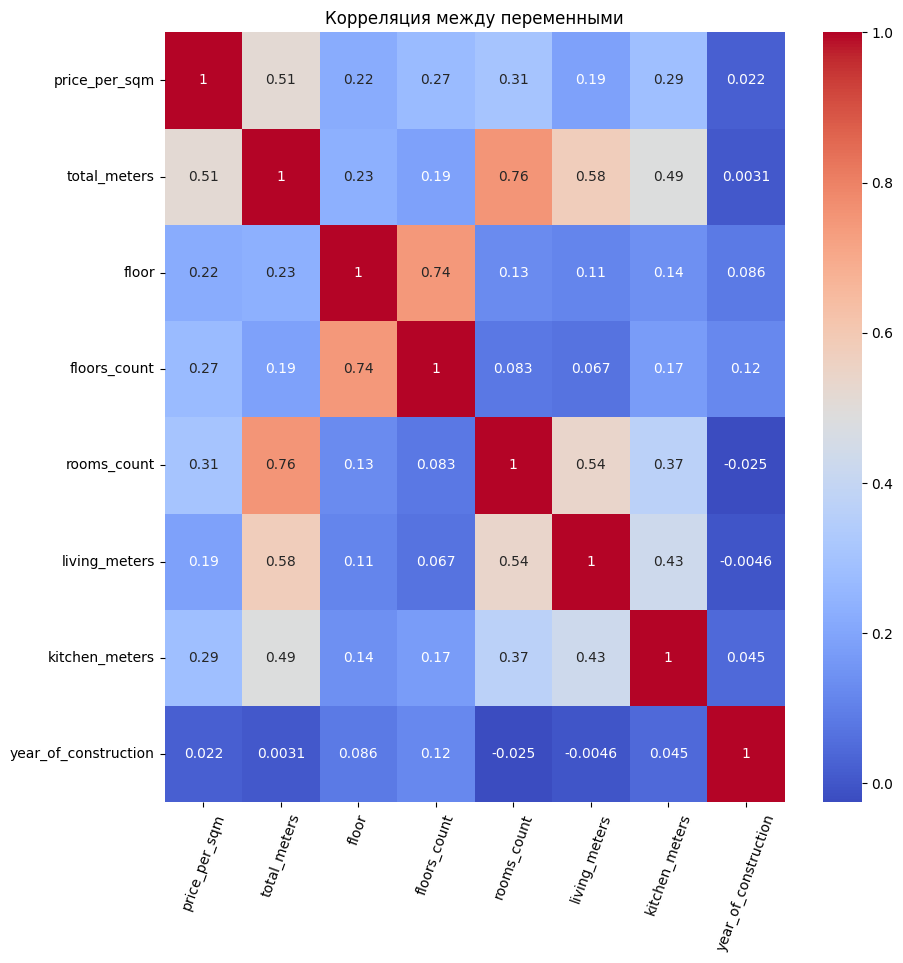

In [38]:
# Построение матрицы корреляции
correlation_matrix = df[['price_per_sqm', 'total_meters', 'floor', 'floors_count', 'rooms_count', 'living_meters', 'kitchen_meters', 'year_of_construction']].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", annot_kws={"size": 10})
plt.xticks(rotation=70, fontsize=10)
plt.title("Корреляция между переменными")


- Среди всех факторов на цену за квадратный метр (price_per_sqm) заметное влияние оказывает общая площадь(total_meters) (коэффициент 0.51). Остальные факторы, такие как этажность (floors_count, floor) и количество комнат (rooms_count), также оказывают влияние, но они не так ярко выражено.

Text(0, 0.5, 'Цена за кв.м')

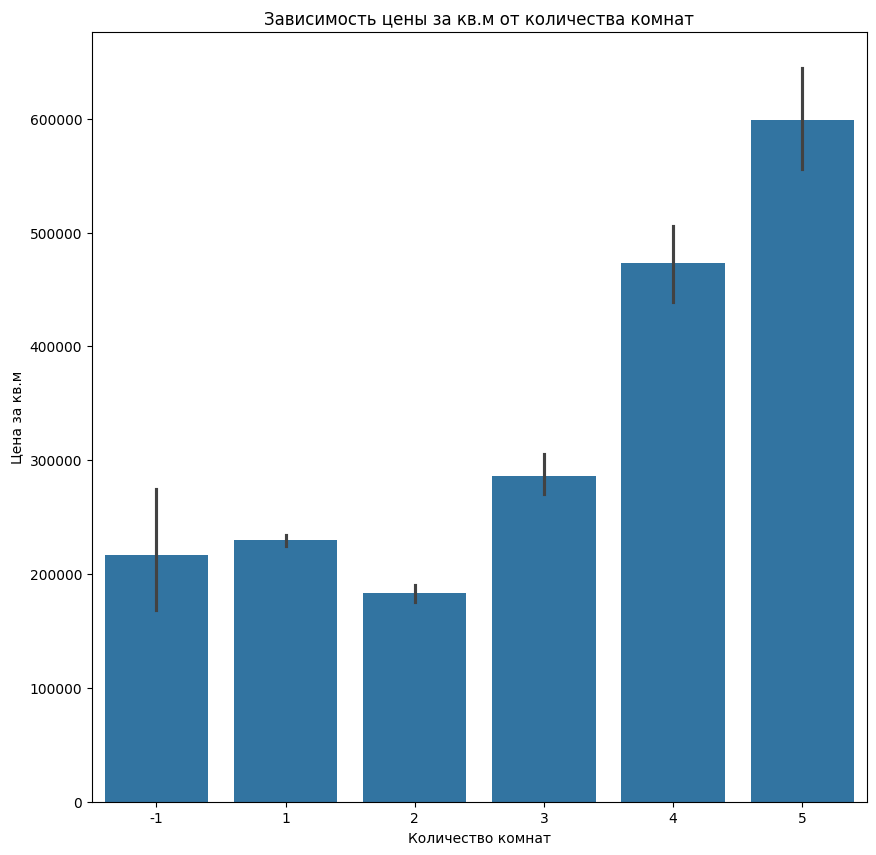

In [41]:
# Влияние количества комнат на цену за квадратный метр
plt.figure(figsize=(10, 10))
sns.barplot(x="rooms_count", y="price_per_sqm", data=df)
plt.title("Зависимость цены за кв.м от количества комнат")
plt.xlabel("Количество комнат")
plt.ylabel("Цена за кв.м")

Text(0, 0.5, 'Цена за кв.м')

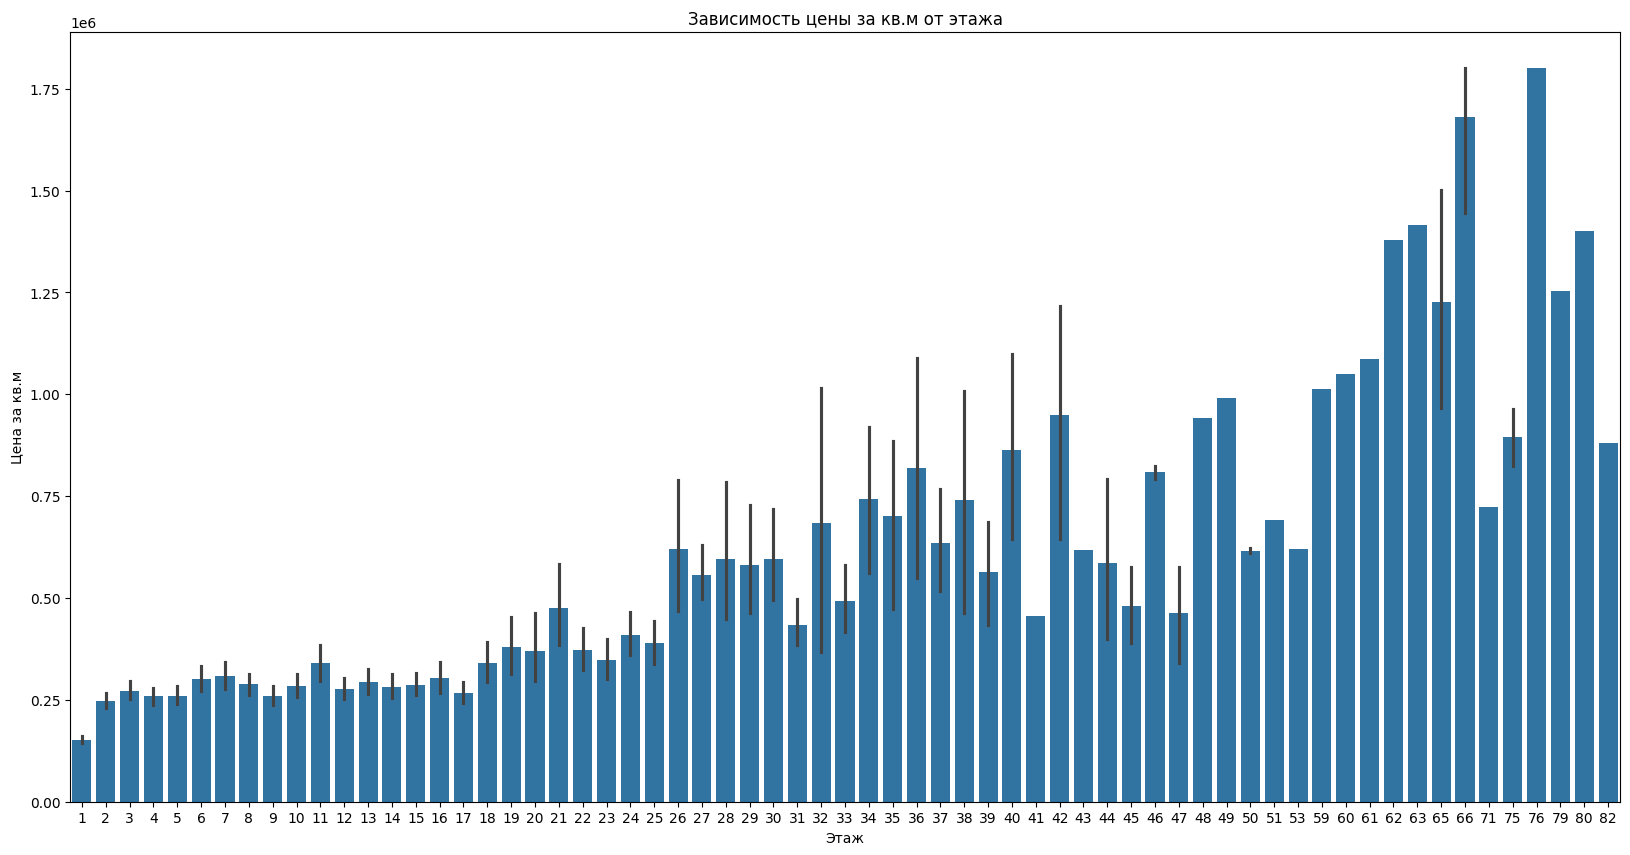

In [40]:
# Влияние этажа на цену за квадратный метр
plt.figure(figsize=(20, 10))
sns.barplot(x="floor", y="price_per_sqm", data=df)
plt.title("Зависимость цены за кв.м от этажа")
plt.xlabel("Этаж")
plt.ylabel("Цена за кв.м")

- Первый график показывает, как средняя цена за квадратный метр изменяется в зависимости от количества комнат. Можно заметить, что с увеличением количества комнат цена за квадратный метр возрастает, особенно это заметно для 4- и 5-комнатных квартир. Это может быть связано с более высоким классом жилья или более просторными квартирами с дополнительными удобствами.

- Второй график демонстрирует распределение средней цены за квадратный метр по этажам. Видно, что на более высоких этажах (особенно от 20-го и выше) средняя цена за квадратный метр в целом растет.

## Заключение

Основываясь на проведённом анализе, можно выделить следующие ключевые выводы:
1.	Этажность: анализ зависимости стоимости от этажности показал, что квартиры на средних этажах в целом имеют более высокую стоимость. Это может быть связано с тем, что средние этажи считаются более удобными для проживания.
2.	Количество комнат и площадь: цена за квадратный метр имеет тенденцию к увеличению в зависимости от количества комнат, особенно для квартир с четырьмя и пятью комнатами. Это говорит о том, что более крупные объекты более востребованы среди покупателей, несмотря на их высокую стоимость.
3.	Другие факторы: несмотря на выявленные зависимости, такие факторы, как наличие инфраструктуры, вид из окна, качество отделки, также могут оказывать влияние на цену, однако их необходимо исследовать отдельно, так как их вклад может быть неоднозначным и индивидуально различаться по объектам. К тому же эти данные могли бы участвовать в анализе, однако инструмент сбора данных не позволял сохранить значения в большинстве случаев.

#### Итог: Проведённый анализ показывает, что ключевые факторы, такие как площадь квартиры, количество комнат и этажность, играют основную роль в формировании цены на недвижимость. 